In [26]:
#importing dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
#data collection and processing
#load the data into the pandas
car_daset = pd.read_csv("///home/nzangi/Downloads/youtube-dl/ML projects/Datasets/car data.csv")

In [7]:
#print the first 5 rows
car_daset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [9]:
#checking number of rows and columns in the data set
car_daset.shape

(301, 9)

In [10]:
#getting more information about the data set
car_daset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#checking the missing values
car_daset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
#checking the distribution of the categorical data
print(car_daset.Fuel_Type.value_counts())
print(car_daset.Seller_Type.value_counts())
print(car_daset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [14]:
#Encoding the categorical data
#encoding the fuel data
car_daset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':3}},inplace=True)

#encoding the seller data
car_daset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding the Transmission data
car_daset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)




In [16]:
# print data after encoding
car_daset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [19]:
#splitting data into training and testing data
X = car_daset.drop(["Car_Name","Selling_Price"], axis=1)
Y = car_daset["Selling_Price"]


In [20]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [23]:
#spliting data and train data
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size = 0.1,random_state = 2)

In [27]:
#model trainning
#loading linear regression model
model = LinearRegression()

In [36]:
#train the model
model.fit(X_train,Y_train)

LinearRegression()

In [29]:
# model evaluation
#prediction on the training data
training_data_prediction = model.predict(X_train)


In [31]:
#R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(f"The R squared Error is: {error_score}")

The R squared Error is: 0.8777735182846058


Text(0.5, 1.0, 'Actual verses Predicated prices')

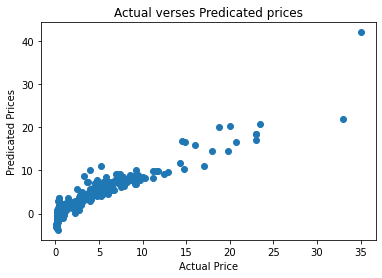

In [32]:
#visualize the actual price and predicated prices on trained data
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Prices")
plt.title("Actual verses Predicated prices")

In [33]:
#prediction on the test data
test_data_prediction = model.predict(X_test)

In [34]:
#R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(f"The R squared Error is: {error_score}")

The R squared Error is: 0.8162925313688913


Text(0.5, 1.0, 'Actual verses Predicated prices')

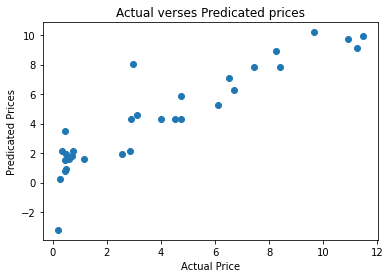

In [35]:
#visualize the actual price and predicated prices on test data
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Prices")
plt.title("Actual verses Predicated prices")

In [41]:
#Lasco Regression
lasso_model = Lasso()

In [44]:
#train the model
lasso_model.fit(X_train,Y_train)

Lasso()

In [45]:
#prediction on the training data
test_data_prediction = lasso_model.predict(X_test)


In [46]:
#R suarederror
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(f"The R squared Error is: {error_score}")

The R squared Error is: 0.8709167941173195


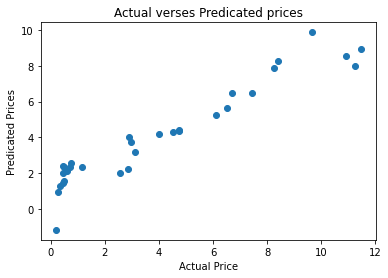

In [47]:
#visualize the actual price and predicated prices on test data
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Prices")
plt.title("Actual verses Predicated prices")
plt.show()